### KNN Algorithm
#### 5/18/2023
#### Predict the age of an abalone using machine learning

In [12]:
import pandas as pd
import numpy as np

In [13]:
# load the data 
abalone = pd.read_csv('./data/abalone.data', header=None)

In [14]:
abalone.columns = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
abalone

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [15]:
abalone = abalone.drop('Sex', axis=1)

In [16]:
abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


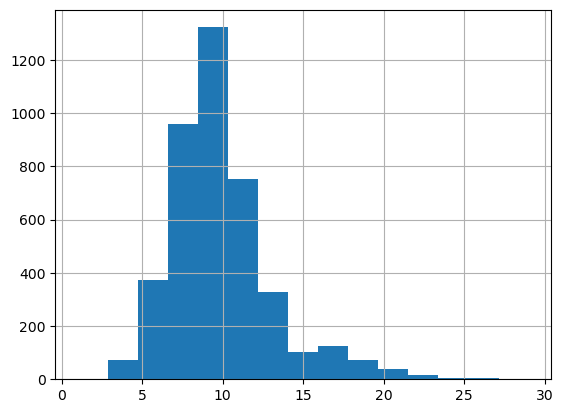

In [17]:
import matplotlib.pyplot as plt
abalone['Rings'].hist(bins=15)
plt.show()

In [18]:
corr_matrix = abalone.corr()
corr_matrix['Rings']

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [19]:
# Example of calculating euclidean  distance using numpy
a = np.array([2,2])
b = np.array([4,4])
np.linalg.norm(a-b)

2.8284271247461903

In [21]:
X = abalone.drop('Rings', axis=1)
X = X.values

y = abalone['Rings']
y = y.values

In [31]:
# Create a new data point that we are going to try to predict
new_data_point = np.array([0.569552, 0.446407,0.154437,1.016849,0.439051,0.222526,0.291208])

distances = np.linalg.norm(X-new_data_point, axis=1)
len(distances)

4177

In [39]:
# Identify the nearest k neighbors and return their index
k = 3
nearest_neighbor_index = distances.argsort()[:k]
nearest_neighbor_index

array([4045, 1902, 1644], dtype=int32)

In [40]:
# Using the indicies above identify their age
nearest_neighbor_rings = y[nearest_neighbor_index]

nearest_neighbor_rings

array([ 9, 11, 10], dtype=int64)

In [41]:
# Avergage the number of rings to get a prediction
prediction = nearest_neighbor_rings.mean()
prediction

10.0

In [42]:
# implement using packages
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [43]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)

In [44]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [46]:
train_predict = knn_model.predict(X_train)

In [48]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_train, train_predict)
rmse = sqrt(mse)
rmse

1.6538366794859511

In [51]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

2.375417924000521